# CNN Word Clouds #

In this notebook, I will view wordclouds from 12 months of CNN news.

In [49]:
import pandas as pd
import numpy as np
import re

from datetime import datetime
from dateutil.relativedelta import relativedelta

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [39]:
cnn_df = pd.read_csv('../data/interim/cnn-last-year-sent-comb.csv').drop(columns=['Unnamed: 0', 
                                                                                 'Unnamed: 0.1',
                                                                                 'Unnamed: 0.1.1'])

In [40]:
len(cnn_df)

3460457

In [41]:
cnn_df['start_time'] = pd.to_datetime(cnn_df['start_time'])
cnn_df['stop_time'] = pd.to_datetime(cnn_df['stop_time'])
cnn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3460457 entries, 0 to 3460456
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   sentence     object        
 1   start_snip   int64         
 2   end_snip     int64         
 3   contributor  object        
 4   runtime      object        
 5   start_time   datetime64[ns]
 6   stop_time    datetime64[ns]
 7   identifier   object        
 8   subjects     object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 237.6+ MB


In [44]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could',
                           '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many',
                           'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily',
                           'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right',
                           'line', 'even', 'also', 'may', 'take', 'come', 'hi', 'ha', 'le', 'u', 'wa', 'thi',
                           'to', 'one'])

In [43]:
month_1_start = cnn_df['start_time'].min()
month_1_end = month_1_start + relativedelta(months=1)
month_1_df = cnn_df[cnn_df['start_time'] < month_1_end]
len(month_1_df)

314660

In [45]:
def clean_sent(sentences):
    for sent in sentences:
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = re.sub("([\d,\,\./!#$%&\'\":;>\?@\[\]`)(\+])+", "", sent) # remove digits and remove punctuation
        sent = re.sub("([-])+", " ", sent)
        yield(sent)  

In [46]:
corpus = list(clean_sent(month_1_df.sentence.values.tolist()))

In [61]:
vect = CountVectorizer(strip_accents='unicode', stop_words=stop_words, 
                       min_df=2, max_df=0.3, ngram_range=(2,2))
count_data = vect.fit_transform(corpus)

In [62]:
words = vect.get_feature_names()
total_counts = np.zeros(len(words))
for t in count_data:
    total_counts+=t.toarray()[0]
    
count_dict = dict(zip(words, total_counts))

In [63]:
count_dict

{'aa aa': 11.0,
 'aa aye': 11.0,
 'aa battery': 30.0,
 'aaron david': 4.0,
 'aaron let': 2.0,
 'aaron put': 2.0,
 'aaron raus': 3.0,
 'aaron rouse': 10.0,
 'aaron sorkin': 2.0,
 'aaron warned': 2.0,
 'aarons interview': 2.0,
 'aarp medicare': 12.0,
 'aarp name': 2.0,
 'ab ab': 27.0,
 'ab comes': 3.0,
 'ab morning': 2.0,
 'ab please': 14.0,
 'aba today': 2.0,
 'aback requests': 2.0,
 'abandon courts': 3.0,
 'abandon find': 2.0,
 'abandoned houses': 2.0,
 'abandoned idea': 2.0,
 'abbey philips': 2.0,
 'abbey phillips': 2.0,
 'abbey president': 2.0,
 'abbey tea': 2.0,
 'abbeys distinguished': 2.0,
 'abbott helping': 15.0,
 'abbott makes': 14.0,
 'abby alana': 2.0,
 'abby hell': 2.0,
 'abby mentioned': 2.0,
 'abby much': 2.0,
 'abby philip': 20.0,
 'abby phillip': 56.0,
 'abby phillips': 9.0,
 'abby president': 2.0,
 'abby said': 2.0,
 'abby white': 4.0,
 'abc access': 2.0,
 'abc george': 2.0,
 'abc got': 2.0,
 'abc interview': 11.0,
 'abc interviews': 4.0,
 'abc never': 2.0,
 'abc news': 

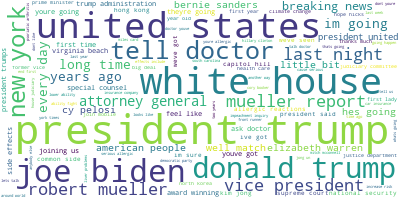

In [64]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate_from_frequencies(count_dict)
# Visualize the word cloud
wordcloud.to_image()

In [67]:
wordcloud.to_file('../reports/month_1.png')

In [66]:
start_date = cnn_df['start_time'].min()
month_df_list = []
for i in range(12):
    month_start = start_date + relativedelta(months=i)
    month_end = month_start + relativedelta(months=1)
    month_df = cnn_df[(cnn_df['start_time'] >= month_start) & (cnn_df['start_time'] < month_end)]
    print(len(month_df))
    month_df_list.append(month_df)
    
print(len(month_df_list))

314660
287607
287572
361432
311815
343277
283291
258790
285900
300262
220335
205516
12


In [68]:
count_dicts = []
for i in range(12):
    corpus = list(clean_sent(month_df_list[i].sentence.values.tolist()))
    count_data = vect.fit_transform(corpus)
    words = vect.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    count_dicts.append(dict(zip(words, total_counts)))
    print(len(count_dicts))

1
2
3
4
5
6
7
8
9
10
11
12


In [69]:
for i in range(12):
    # Generate a word cloud
    wordcloud.generate_from_frequencies(count_dicts[i])
    # Visualize the word cloud
    wordcloud.to_image()
    wordcloud.to_file('../reports/figures/month_' + str(i) + 'cnn.png')

In [73]:
for i in range(12):
    df = pd.DataFrame(count_dicts[i], index=[0])
    df.to_csv(r'../reports/cnn_month_' + str(i) + 'word_frequencies.csv')